In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [14, 9]
import matplotlib.pyplot as plt

import utils
from add_fourier import get_fourier_fn

Warning, 6 of 3739 bins contained negative fluxes; they have been set to zero.


/home/tim/miniconda3/envs/pluto/lib/python3.7/site-packages/pysynphot/units.py:913: RuntimeWarning: divide by zero encountered in true_divide
  normalized = flux / resampled._fluxtable
/home/tim/miniconda3/envs/pluto/lib/python3.7/site-packages/pysynphot/units.py:913: RuntimeWarning: invalid value encountered in true_divide
  normalized = flux / resampled._fluxtable
/home/tim/miniconda3/envs/pluto/lib/python3.7/site-packages/pysynphot/units.py:914: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * N.log10(normalized)


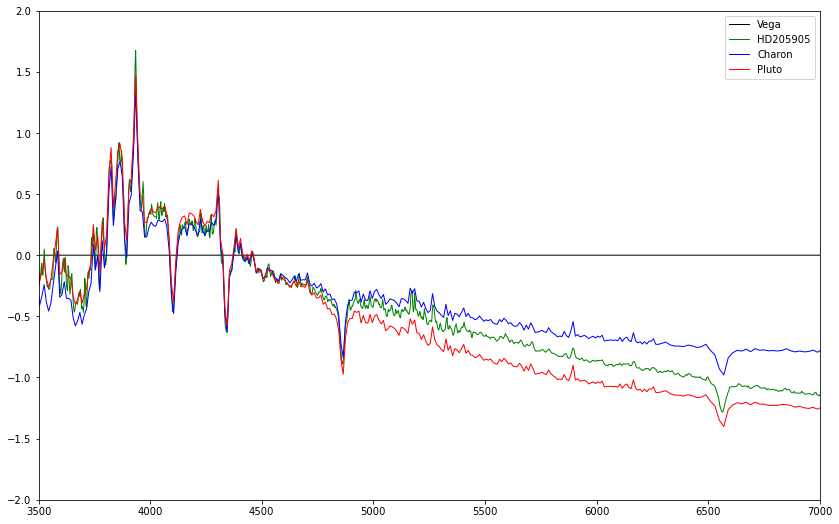

In [13]:
spectrum_names = ['vega', 'hd', 'charon', 'pluto']
spectrum_dict = {spec: utils.get_spectrum(spec) for spec in spectrum_names}

for name, spectrum in spectrum_dict.items():
    spectrum.convert('angstrom')
    spectrum.convert('vegamag')
    spectrum = spectrum.renorm(0, "vegamag", utils.get_bandpass("johnson_b"))
    plt.plot(
        spectrum.wave, spectrum.flux, 
        c=utils.COLORMAP[name], 
        label=utils.LABELMAP[name],
        linewidth=1,
    )
    
plt.gca().invert_yaxis()
plt.xlim(3500, 7000)
plt.ylim(-2, 2)
plt.legend()
plt.show()